In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import math as m
import pandas as pd
import matplotlib.pyplot as plt


Material: 1045CR
Diameter = 0.377 in
Gauge Length = 2.0 in
Torsional Rigidity = 22.963
Shear Modulus: G = 11578.84


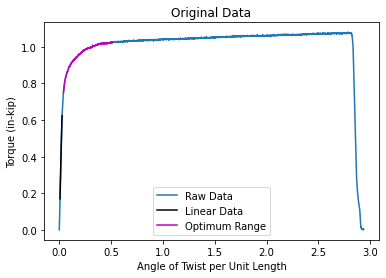

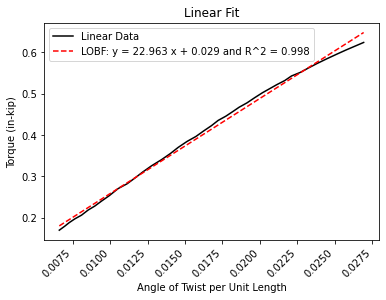

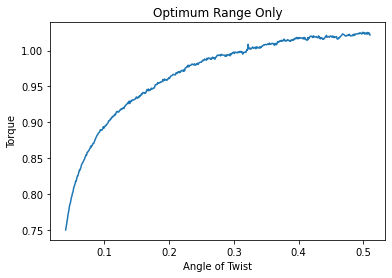

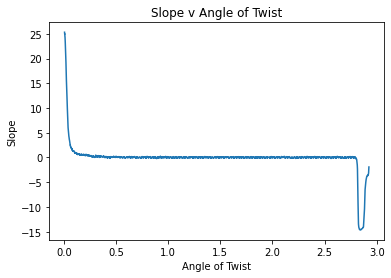


Material: 1018HR
Diameter = 0.376 in
Gauge Length = 2.0 in
Torsional Rigidity = 26.426
Shear Modulus: G = 13467.3


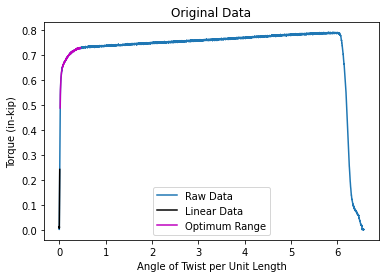

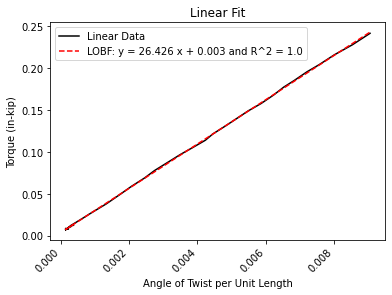

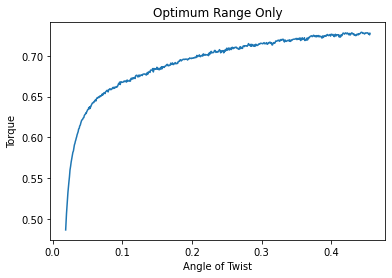

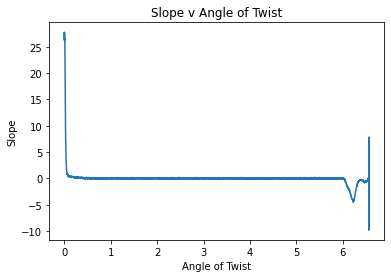


Material: Al6061
Diameter = 0.376 in
Gauge Length = 2.0 in
Torsional Rigidity = 8.447
Shear Modulus: G = 4304.95


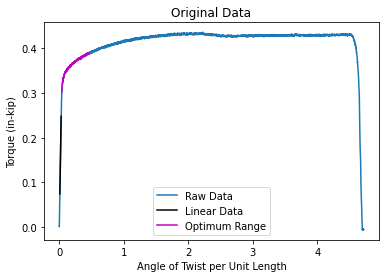

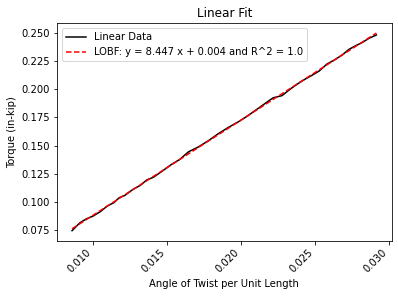

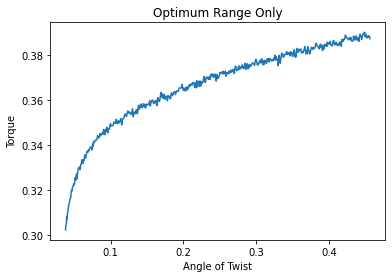

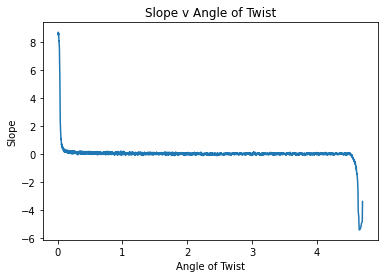


Material: Naval Brass
Diameter = 0.379 in
Gauge Length = 2.0 in
Torsional Rigidity = 12.328
Shear Modulus: G = 6085.87


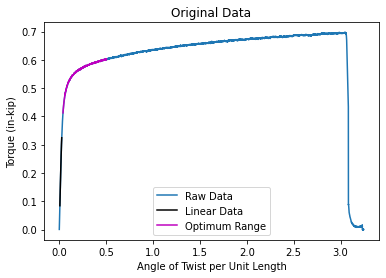

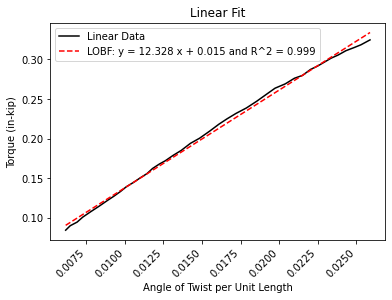

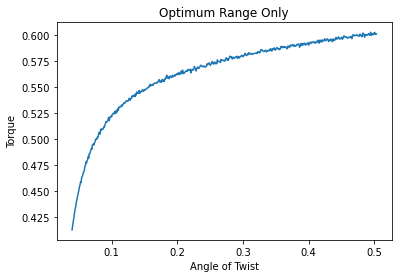

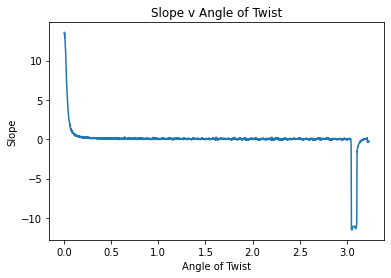

In [ ]:
data_file = pd.read_excel('/content/drive/MyDrive/Fall2022/MechLab2_419/Lab8_Torsion/Torsion_Test_BB.xlsx', sheet_name=None)

for name, sheet in data_file.items():
    sheet['sheet'] = name
    #sheet = sheet.rename(columns=lambda x: x.split('\n')[-1])
    sheet = sheet.to_numpy()
    print(f'\nMaterial: {name}')

    #Data
    D = sheet[0,5] #in
    L = sheet[1,5] #in
    print(f'Diameter = {D} in')
    print(f'Gauge Length = {L} in')

    t = sheet[1:,0] #ms
    torque = sheet[1:,1].astype('float') #ft lb
    theta = sheet[1:,2].astype('float') #degree

    Torque = torque * 12 / 1000 #in kips
    phi = theta * (np.pi / 180) #radian
    phi_prime = phi / L 

    #Linear Fit
    linear_torque = Torque[20:60]
    linear_phi_prime = phi_prime[20:60]
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(
        linear_phi_prime, linear_torque)
    print(f'Torsional Rigidity = {round(slope, 3)}')

    #Shear Modulus
    J = np.pi * (D**4) / 32
    G = slope / J #Find UNITS
    print(f'Shear Modulus: G = {round(G, 2)}')

    #Constants for Central Difference and Moving Average
    N = 20
    n = 20
    slopes = []

    #Central Difference 
    for i in range(np.size(phi_prime)):
      if i-N > 0 and i+N<np.size(phi_prime):
        CD = (Torque[i+N] - Torque[i-N]) / (phi_prime[i+N] - phi_prime[i-N])
        slopes.append(CD)

    #Moving Average 
    values = pd.DataFrame()
    values.insert(0, 'Slopes', slopes)
    MA = values['Slopes'].rolling(window=N, center = True).mean()

    #Optimum Window 
    upper = 650
    lower = 80
    opt_torque = Torque[lower:upper]
    opt_phi_prime = phi_prime[lower:upper]

    #Resizing so everything is same length
    start = N
    end = len(phi_prime)
    resize_phi_prime = phi_prime[N:end-N-1]


    ##Plots
    #Raw Data Plot
    plt.plot(phi_prime, Torque, label = 'Raw Data')
    plt.plot(linear_phi_prime, linear_torque, 'k', label = 'Linear Data')
    plt.plot(opt_phi_prime, opt_torque, 'm', label = 'Optimum Range')
    plt.xlabel('Angle of Twist per Unit Length')
    plt.ylabel('Torque (in-kip)')
    plt.title('Original Data')
    plt.legend()
    plt.show()

    #Linear Plot
    plt.plot(linear_phi_prime, linear_torque, 'k', label = 'Linear Data')
    plt.plot(linear_phi_prime, slope*linear_phi_prime+intercept, 'r--', 
             label = f'LOBF: y = {round(slope, 3)} x + {round(intercept,3)} and R^2 = {round(r_value, 3)}')
    plt.xlabel('Angle of Twist per Unit Length')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Torque (in-kip)')
    plt.title('Linear Fit')
    plt.legend()
    plt.show()

    #Optimum Region
    plt.plot(opt_phi_prime, opt_torque, label = 'Optimum Range')
    plt.title('Optimum Range Only')
    plt.xlabel('Angle of Twist')
    plt.ylabel('Torque')
    plt.show()

    #Central Difference and Moving Average Plot
    
    plt.plot(resize_phi_prime, slopes)
    plt.xlabel('Angle of Twist')
    plt.ylabel('Slope')
    plt.title('Slope v Angle of Twist')
    plt.show()
    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')